<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/Mean_Reversion_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating and Backtesting Mean-Reversion Strategies (Bollinger Bands)

## Getting the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import datetime as dt
import pandas as pd
%pip install yfinance
import yfinance as yf


In [ ]:
start = dt.datetime.today()-dt.timedelta(3000)
end = dt.datetime.today()
data = pd.DataFrame()
interval = "90m"
ticker = 'EURUSD=X'
df= yf.download(ticker,start,end)
data['price']= df[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,price
Date,
2013-11-18,1.348399
2013-11-19,1.350439
2013-11-20,1.356742
2013-11-21,1.343382
2013-11-22,1.347182
...,...
2022-01-27,1.124354
2022-01-28,1.114703
2022-01-31,1.115237


In [ ]:
data

,price
Date,
2013-11-18,1.348399
2013-11-19,1.350439
2013-11-20,1.356742
2013-11-21,1.343382
2013-11-22,1.347182
...,...
2022-01-27,1.124354
2022-01-28,1.114703
2022-01-31,1.115237


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2140 entries, 2013-11-18 to 2022-02-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2140 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


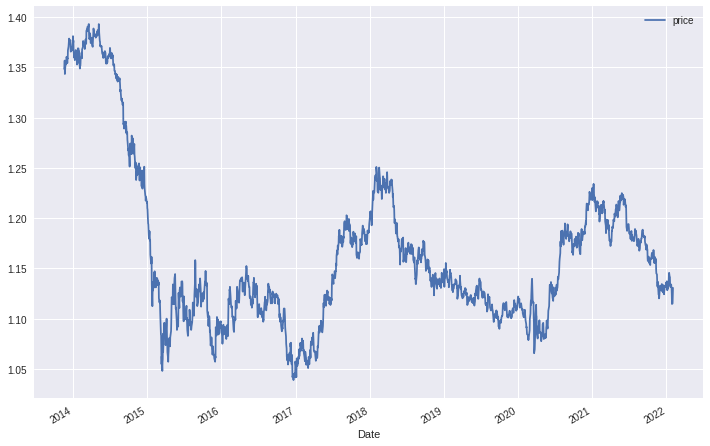

In [ ]:
data.plot(figsize = (12, 8))
plt.show()

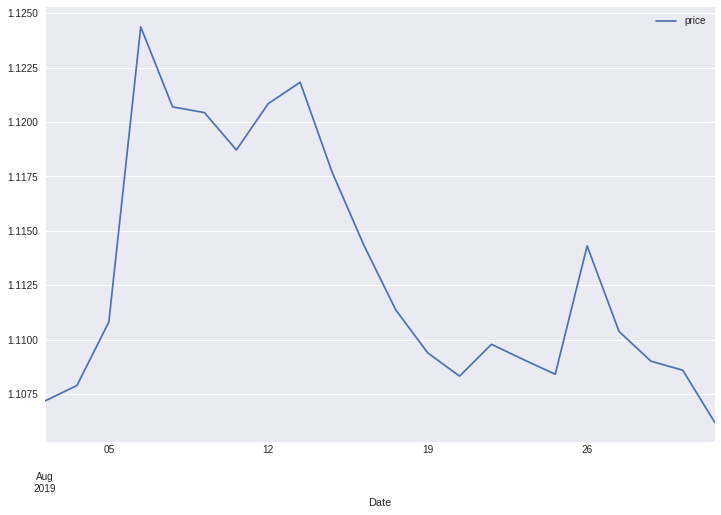

In [ ]:
data.loc["2019-08"].plot(figsize = (12, 8))
plt.show()

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data

,price,returns
Date,,
2013-11-18,1.348399,NaN
2013-11-19,1.350439,0.001511
2013-11-20,1.356742,0.004656
2013-11-21,1.343382,-0.009896
2013-11-22,1.347182,0.002825
...,...,...
2022-01-27,1.124354,-0.005411
2022-01-28,1.114703,-0.008620
2022-01-31,1.115237,0.000479


## Defining a Mean-Reversion Strategy (Bollinger Bands) (Part 1)

__Mean Reversion__: Financial Instruments are from time to time overbought / oversold and revert back to mean prices. 

__Bollinger Bands__: Consists of a SMA (e.g. 30) and Upper and Lower Bands +- (2) Std Dev away from SMA.

In [ ]:
SMA = 30
dev = 2

In [ ]:
data["SMA"] = data["price"].rolling(SMA).mean()

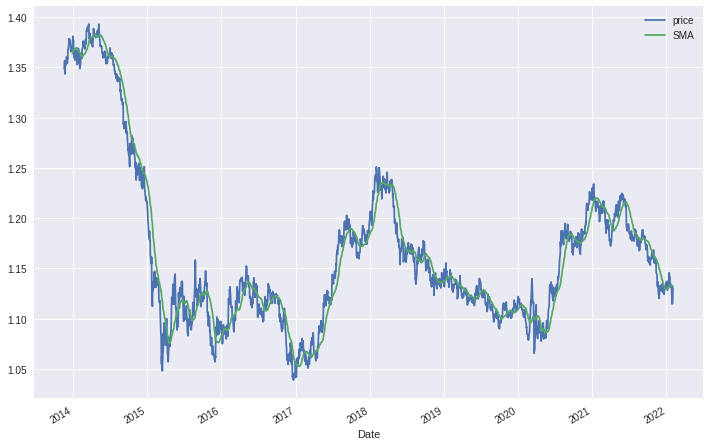

In [ ]:
data[["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

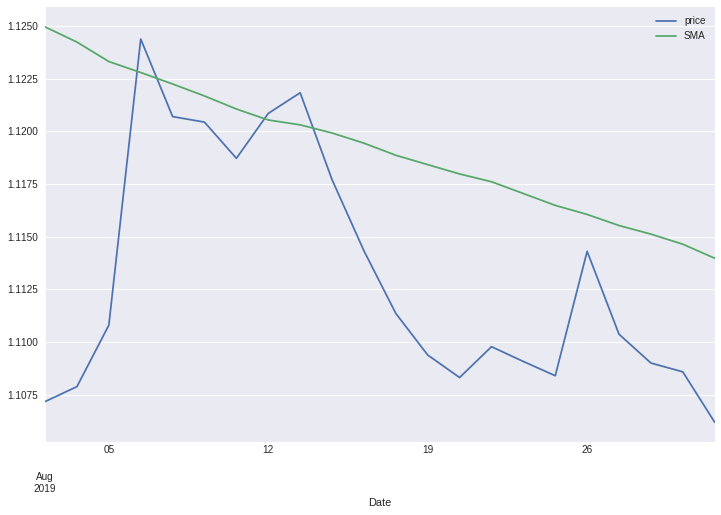

In [ ]:
data.loc["2019-08", ["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

In [ ]:
data["price"].rolling(SMA).std()

Date
2013-11-18         NaN
2013-11-19         NaN
2013-11-20         NaN
2013-11-21         NaN
2013-11-22         NaN
                ...   
2022-01-27    0.004962
2022-01-28    0.006014
2022-01-31    0.006646
2022-02-01    0.006817
2022-02-02    0.006792
Name: price, Length: 2140, dtype: float64

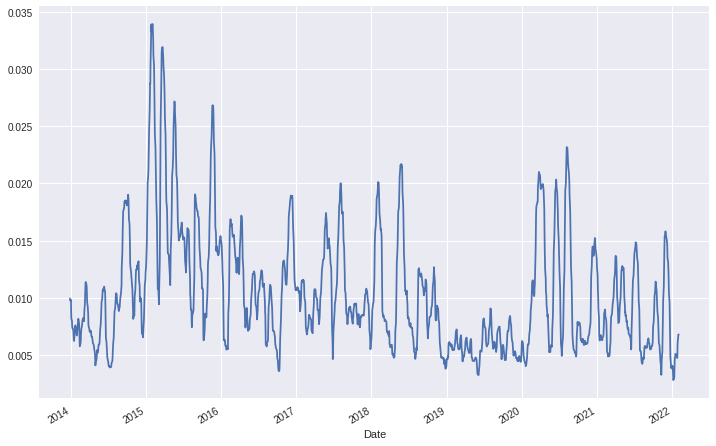

In [ ]:
data["price"].rolling(SMA).std().plot(figsize = (12, 8 ))
plt.show()

In [ ]:
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev # Lower Band -2 Std Dev

In [ ]:
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev # Upper Band -2 Std Dev

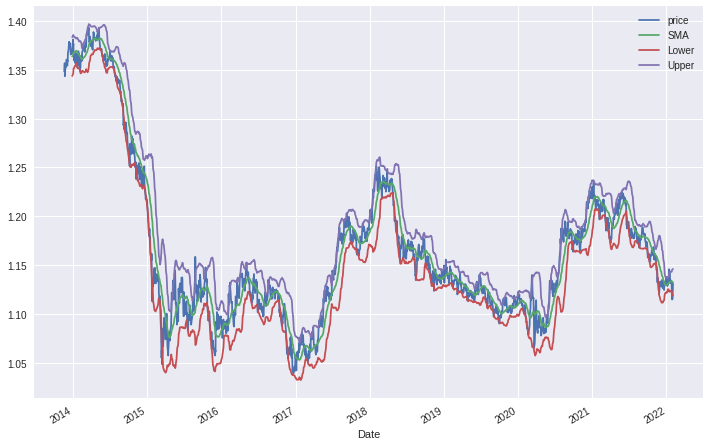

In [ ]:
data.drop(columns = "returns").plot(figsize = (12, 8))
plt.show()

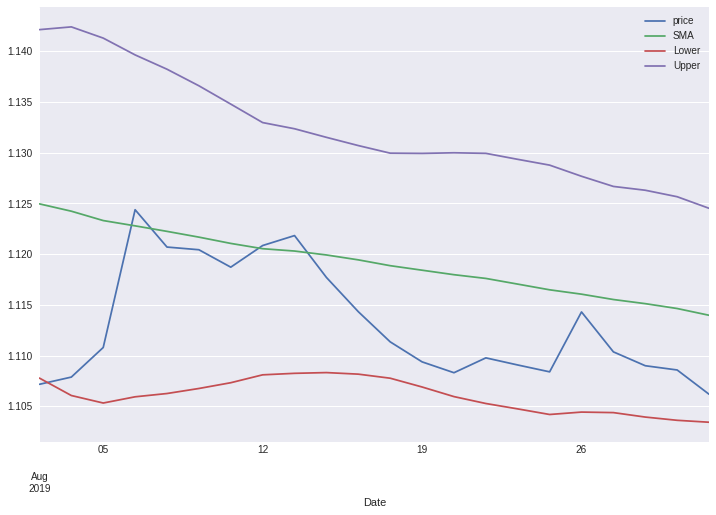

In [ ]:
data.drop(columns = "returns").loc["2019-08"].plot(figsize = (12, 8))
plt.show()

In [ ]:
data.dropna(inplace = True)

## Defining a Mean-Reversion Strategy (Bollinger Bands) (Part 2)

In [ ]:
data

,price,returns,SMA,Lower,Upper
Date,,,,,
2013-12-27,1.369619,0.002025,1.363494,1.343601,1.383387
2013-12-30,1.375024,0.003939,1.364382,1.344904,1.383859
2013-12-31,1.381006,0.004341,1.365400,1.345744,1.385057
2014-01-01,1.374495,-0.004726,1.365992,1.346345,1.385639
2014-01-02,1.376671,0.001582,1.367102,1.349043,1.385161
...,...,...,...,...,...
2022-01-27,1.124354,-0.005411,1.133314,1.123390,1.143239
2022-01-28,1.114703,-0.008620,1.132691,1.120663,1.144718
2022-01-31,1.115237,0.000479,1.132387,1.119094,1.145680


In [ ]:
data["distance"] = data.price - data.SMA # helper Column

In [ ]:
data["position"] = np.where(data.price < data.Lower, 1, np.nan) # 1. oversold -> go long

In [ ]:
data["position"] = np.where(data.price > data.Upper, -1, data["position"]) # 2. overbought -> go short

In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2013-12-27,1.369619,0.002025,1.363494,1.343601,1.383387,0.006125,NaN
2013-12-30,1.375024,0.003939,1.364382,1.344904,1.383859,0.010643,NaN
2013-12-31,1.381006,0.004341,1.365400,1.345744,1.385057,0.015605,NaN
2014-01-01,1.374495,-0.004726,1.365992,1.346345,1.385639,0.008503,NaN
2014-01-02,1.376671,0.001582,1.367102,1.349043,1.385161,0.009569,NaN
...,...,...,...,...,...,...,...
2022-01-27,1.124354,-0.005411,1.133314,1.123390,1.143239,-0.008961,NaN
2022-01-28,1.114703,-0.008620,1.132691,1.120663,1.144718,-0.017988,1.0
2022-01-31,1.115237,0.000479,1.132387,1.119094,1.145680,-0.017149,1.0


In [ ]:
# 3. crossing SMA ("Middle Band") -> go neutral
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2013-12-27,1.369619,0.002025,1.363494,1.343601,1.383387,0.006125,NaN
2013-12-30,1.375024,0.003939,1.364382,1.344904,1.383859,0.010643,NaN
2013-12-31,1.381006,0.004341,1.365400,1.345744,1.385057,0.015605,NaN
2014-01-01,1.374495,-0.004726,1.365992,1.346345,1.385639,0.008503,NaN
2014-01-02,1.376671,0.001582,1.367102,1.349043,1.385161,0.009569,NaN
...,...,...,...,...,...,...,...
2022-01-27,1.124354,-0.005411,1.133314,1.123390,1.143239,-0.008961,NaN
2022-01-28,1.114703,-0.008620,1.132691,1.120663,1.144718,-0.017988,1.0
2022-01-31,1.115237,0.000479,1.132387,1.119094,1.145680,-0.017149,1.0


In [ ]:
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position

In [ ]:
data.position.value_counts()

 0.0    979
 1.0    646
-1.0    486
Name: position, dtype: int64

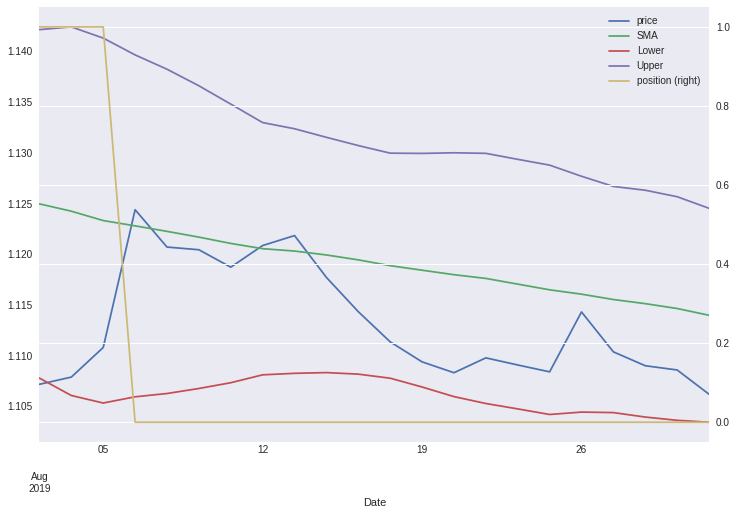

In [ ]:
data.drop(columns = ["returns", "distance"]).loc["2019-08"].plot(figsize = (12, 8), secondary_y = "position")
plt.show()

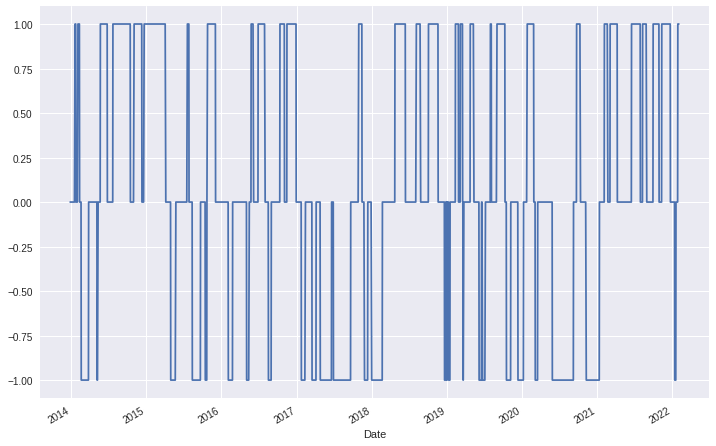

In [ ]:
data.position.plot(figsize = (12, 8))
plt.show()

## Vectorized Strategy Backtesting

In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2013-12-27,1.369619,0.002025,1.363494,1.343601,1.383387,0.006125,0.0
2013-12-30,1.375024,0.003939,1.364382,1.344904,1.383859,0.010643,0.0
2013-12-31,1.381006,0.004341,1.365400,1.345744,1.385057,0.015605,0.0
2014-01-01,1.374495,-0.004726,1.365992,1.346345,1.385639,0.008503,0.0
2014-01-02,1.376671,0.001582,1.367102,1.349043,1.385161,0.009569,0.0
...,...,...,...,...,...,...,...
2022-01-27,1.124354,-0.005411,1.133314,1.123390,1.143239,-0.008961,0.0
2022-01-28,1.114703,-0.008620,1.132691,1.120663,1.144718,-0.017988,1.0
2022-01-31,1.115237,0.000479,1.132387,1.119094,1.145680,-0.017149,1.0


In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy
Date,,,,,,,,
2013-12-30,1.375024,0.003939,1.364382,1.344904,1.383859,0.010643,0.0,0.000000
2013-12-31,1.381006,0.004341,1.365400,1.345744,1.385057,0.015605,0.0,0.000000
2014-01-01,1.374495,-0.004726,1.365992,1.346345,1.385639,0.008503,0.0,-0.000000
2014-01-02,1.376671,0.001582,1.367102,1.349043,1.385161,0.009569,0.0,0.000000
2014-01-03,1.366662,-0.007297,1.367751,1.351330,1.384173,-0.001089,0.0,-0.000000
...,...,...,...,...,...,...,...,...
2022-01-27,1.124354,-0.005411,1.133314,1.123390,1.143239,-0.008961,0.0,-0.000000
2022-01-28,1.114703,-0.008620,1.132691,1.120663,1.144718,-0.017988,1.0,-0.000000
2022-01-31,1.115237,0.000479,1.132387,1.119094,1.145680,-0.017149,1.0,0.000479


In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

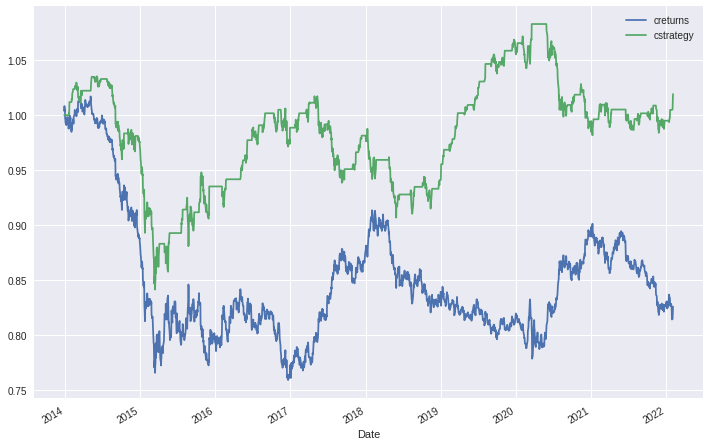

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy
Date,,,,,,,,,,
2013-12-30,1.375024,0.003939,1.364382,1.344904,1.383859,0.010643,0.0,0.000000,1.003946,1.000000
2013-12-31,1.381006,0.004341,1.365400,1.345744,1.385057,0.015605,0.0,0.000000,1.008314,1.000000
2014-01-01,1.374495,-0.004726,1.365992,1.346345,1.385639,0.008503,0.0,-0.000000,1.003560,1.000000
2014-01-02,1.376671,0.001582,1.367102,1.349043,1.385161,0.009569,0.0,0.000000,1.005149,1.000000
2014-01-03,1.366662,-0.007297,1.367751,1.351330,1.384173,-0.001089,0.0,-0.000000,0.997841,1.000000
...,...,...,...,...,...,...,...,...,...,...
2022-01-27,1.124354,-0.005411,1.133314,1.123390,1.143239,-0.008961,0.0,-0.000000,0.820924,1.004816
2022-01-28,1.114703,-0.008620,1.132691,1.120663,1.144718,-0.017988,1.0,-0.000000,0.813878,1.004816
2022-01-31,1.115237,0.000479,1.132387,1.119094,1.145680,-0.017149,1.0,0.000479,0.814268,1.005298


In [ ]:
ptc = 0.00007

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades
Date,,,,,,,,,,,
2013-12-30,1.375024,0.003939,1.364382,1.344904,1.383859,0.010643,0.0,0.000000,1.003946,1.000000,0.0
2013-12-31,1.381006,0.004341,1.365400,1.345744,1.385057,0.015605,0.0,0.000000,1.008314,1.000000,0.0
2014-01-01,1.374495,-0.004726,1.365992,1.346345,1.385639,0.008503,0.0,-0.000000,1.003560,1.000000,0.0
2014-01-02,1.376671,0.001582,1.367102,1.349043,1.385161,0.009569,0.0,0.000000,1.005149,1.000000,0.0
2014-01-03,1.366662,-0.007297,1.367751,1.351330,1.384173,-0.001089,0.0,-0.000000,0.997841,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,1.124354,-0.005411,1.133314,1.123390,1.143239,-0.008961,0.0,-0.000000,0.820924,1.004816,0.0
2022-01-28,1.114703,-0.008620,1.132691,1.120663,1.144718,-0.017988,1.0,-0.000000,0.813878,1.004816,1.0
2022-01-31,1.115237,0.000479,1.132387,1.119094,1.145680,-0.017149,1.0,0.000479,0.814268,1.005298,0.0


In [ ]:
data.trades.value_counts()

0.0    1999
1.0     111
Name: trades, dtype: int64

In [ ]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [ ]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,
2013-12-30,1.375024,0.003939,1.364382,1.344904,1.383859,0.010643,0.0,0.000000,1.003946,1.000000,0.0,0.000000,1.000000
2013-12-31,1.381006,0.004341,1.365400,1.345744,1.385057,0.015605,0.0,0.000000,1.008314,1.000000,0.0,0.000000,1.000000
2014-01-01,1.374495,-0.004726,1.365992,1.346345,1.385639,0.008503,0.0,-0.000000,1.003560,1.000000,0.0,-0.000000,1.000000
2014-01-02,1.376671,0.001582,1.367102,1.349043,1.385161,0.009569,0.0,0.000000,1.005149,1.000000,0.0,0.000000,1.000000
2014-01-03,1.366662,-0.007297,1.367751,1.351330,1.384173,-0.001089,0.0,-0.000000,0.997841,1.000000,0.0,-0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,1.124354,-0.005411,1.133314,1.123390,1.143239,-0.008961,0.0,-0.000000,0.820924,1.004816,0.0,-0.000000,0.997109
2022-01-28,1.114703,-0.008620,1.132691,1.120663,1.144718,-0.017988,1.0,-0.000000,0.813878,1.004816,1.0,-0.000070,0.997039
2022-01-31,1.115237,0.000479,1.132387,1.119094,1.145680,-0.017149,1.0,0.000479,0.814268,1.005298,0.0,0.000479,0.997517


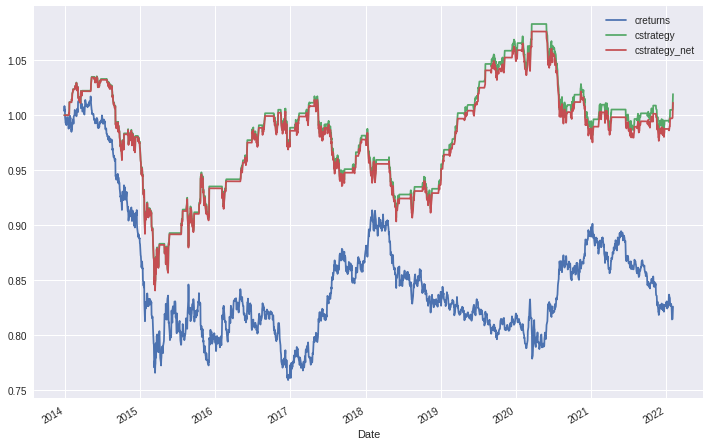

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data[["returns", "strategy_net"]].mean() * (4 * 252) # annualized return

returns        -0.091574
strategy_net    0.005395
dtype: float64

In [ ]:
data[["returns", "strategy_net"]].std() * np.sqrt(4 * 252) # annualized risk

returns         0.154218
strategy_net    0.116045
dtype: float64